<div class="alert alert-block alert-warning">
Please note that plotly figure will not show when it is uploaded to GitHib due to static stuff. So you can rerun the code once you have it on your Local machine or Check out the Link I include in the repo that display the notebook on web.
</div>

By @Geek


## Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

link to dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Import our wrangling and visualization library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [12]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/marketing_campaign.csv", sep="\t")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [13]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

<div class="alert alert-block alert-warning">
Please note that plotly figure will not show when it is uploaded to GitHib due to static stuff. So you can rerun the code once you have it on your Local machine or Check out the Link I include in the repo that display the notebook on web.
</div>

# Content Attributes

## People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

## Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

## Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

## Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

# Exploratory Data Analysis

In [ ]:
df["TotalAmountSpent"] = df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntSweetProducts"] + df["MntMeatProducts"] + df["MntWines"]

### Year Birth

We need to convert year birth to an age feature

In [44]:
from datetime import datetime

In [52]:
df["Age"] = df["Year_Birth"].apply(lambda x : datetime.now().year - x)

2023

In [47]:

#date time module
# from datetime import datetime
# datetime.now().year
# x= datetime(1997,7,27).year
# age= datetime.now().year - x
# from datetime import datetime, timedelta


# # for time in future and past
# print(datetime.now().date()+ timedelta(days=1))
# print(datetime.now().date()+ timedelta(days=2))

# print(datetime.now().date()- timedelta(days=1))

2023-06-23
2023-06-24
2023-06-21


In [85]:
df["Age"].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

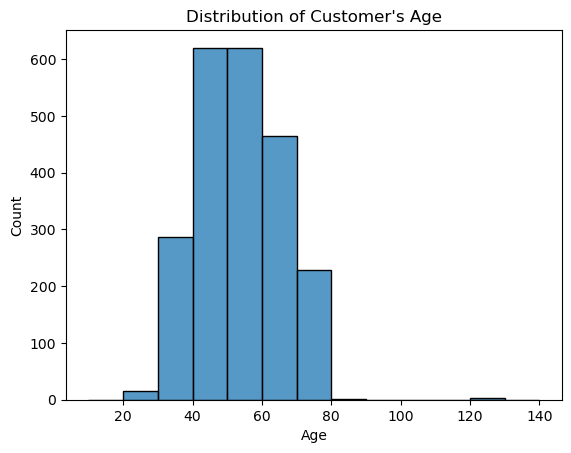

In [ ]:
sns.histplot(data=df, x="Age", bins = list(range(10, 150, 10)))
plt.title("Distribution of Customer's Age")
plt.savefig("Age.png");

It is seen that most of our customer's age distribution is within the range 41-60.

## Education

In [55]:
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [57]:
df["Education"] = df["Education"].replace({"Graduation":"Graduate", "PhD":"Postgraduate", "Master":"Postgraduate", "2n Cycle":"Postgraduate", "Basic":"Undergraduate"})

In [58]:
df["Education"].value_counts()

Graduate         1127
Postgraduate     1059
Undergraduate      54
Name: Education, dtype: int64

In [59]:
df["Education"].unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

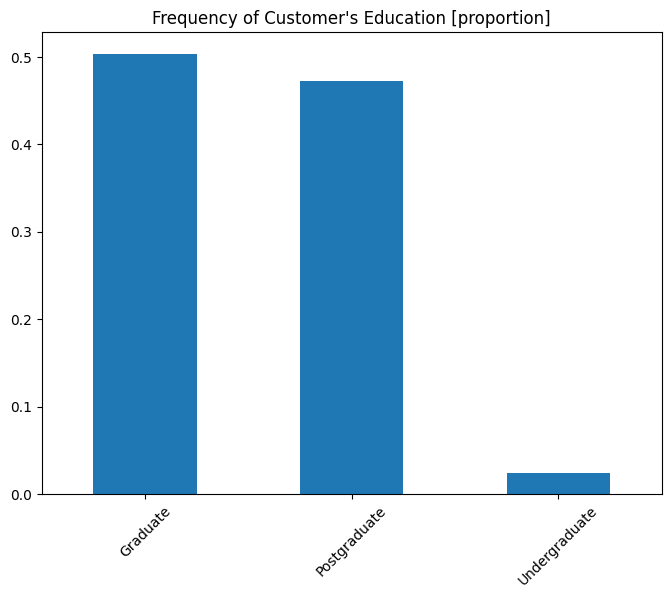

In [60]:
df["Education"].value_counts(normalize=True).plot.bar(figsize=(8, 6))
plt.xticks(rotation=45)
plt.title("Frequency of Customer's Education [proportion]");

It is seen from the above summary that half of our customer's highest education level is first degree graduation. About 50% of customers have their education level at bachelour's degree which is then followed by customers with postgraduate level of education.

## Marital Status

In [61]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [62]:
df["Marital_Status"] = df["Marital_Status"].replace({"Together":"Married", "Absurd":"Single", "Divorced":"Single", "Alone":"Single", "YOLO":"Single", "Widow":"Single"})

In [63]:
fig = px.bar(
    df["Marital_Status"].value_counts(normalize=True),
    title = "Proportion of Customer's Marital Status",
    height=500
)
fig.update_layout(yaxis_title = "Freuency [proportion]")
fig.show()

It is seen from the above summary that close to 65% of customers are married while the remaining close to 35% are single.

## Income

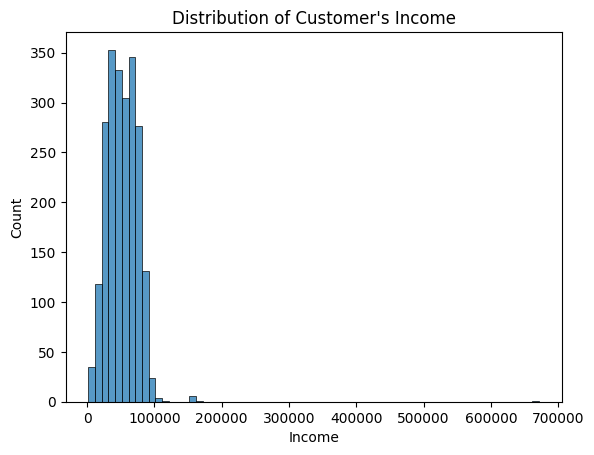

In [64]:
sns.histplot(data=df, x="Income", binwidth=1e4)
plt.title("Distribution of Customer's Income");

It is seen that majority of customer's income is within 0-100k\\$. However we have other customer's that earn way more than that (above 600k\\$)

## Kid Home

In [66]:
df["Kidhome"].unique()

array([0, 1, 2])

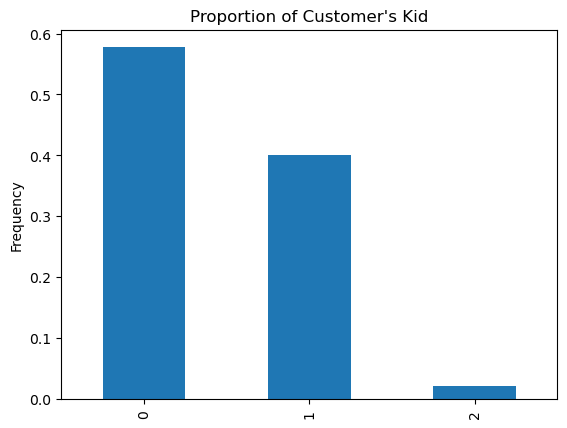

In [ ]:
df["Kidhome"].value_counts(normalize=True).plot.bar()
plt.ylabel("Frequency")
plt.title("Proportion of Customer's Kid");

Above half of customer's do not have kids at home.

## Teen Home

In [67]:
df["Teenhome"].unique()

array([0, 1, 2])

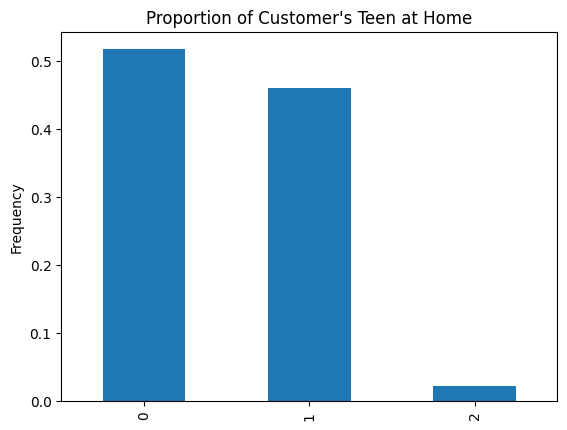

In [68]:
df["Teenhome"].value_counts(normalize=True).plot.bar()
plt.ylabel("Frequency")
plt.title("Proportion of Customer's Teen at Home");

Above 50% of customer's do not have teen at home.

## Total Children

In [69]:
df["Total Children"] = df["Kidhome"] + df["Teenhome"]

In [70]:
df["Total Children"].unique()

array([0, 2, 1, 3])

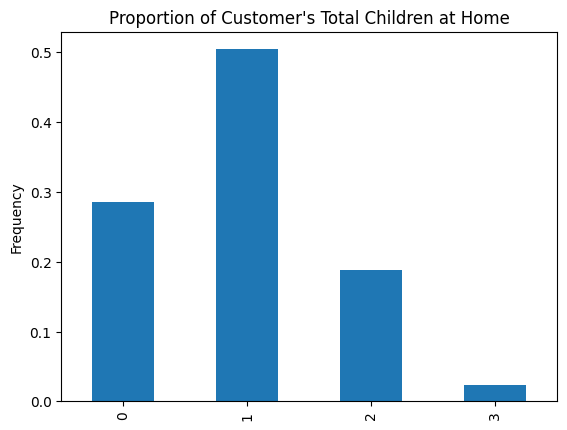

In [71]:
df["Total Children"].value_counts(normalize=True).sort_index().plot.bar()
plt.ylabel("Frequency")
plt.title("Proportion of Customer's Total Children at Home");

Close to half of entire customers have the total number of 1 children, while in the remaining half above quarter of customers have no children at all.

## Total Spent

In [ ]:
df["TotalAmountSpent"].describe()

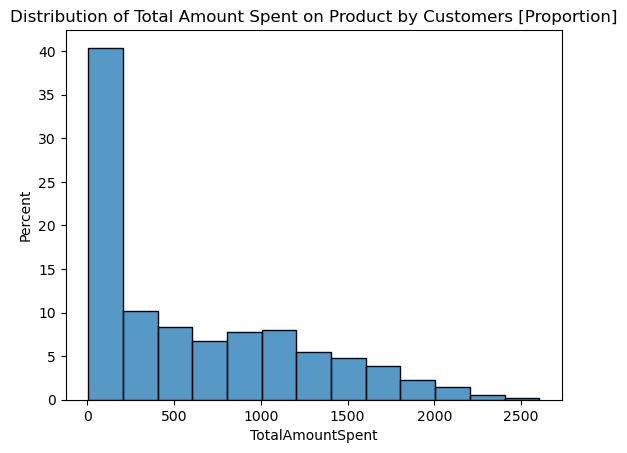

In [ ]:
sns.histplot(data=df, x="TotalAmountSpent", binwidth=200, stat="percent")
plt.title("Distribution of Total Amount Spent on Product by Customers [Proportion]");

It can be seen from the above summary that close to half of customers total amount spent on the companies product is with 0 to 200.

# Bivariate Analysis

## Age VS Total Amount Spent

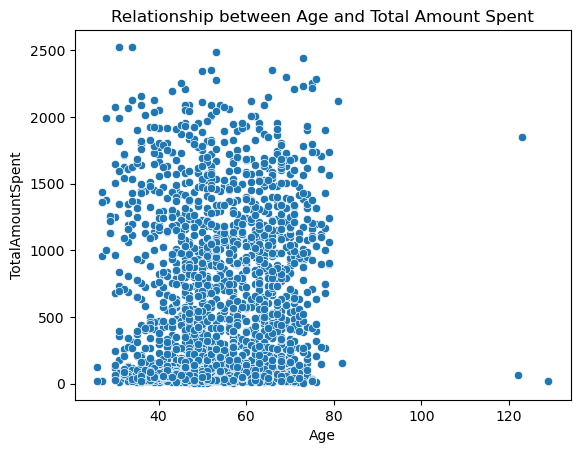

In [ ]:
sns.scatterplot(data=df, x="Age", y="TotalAmountSpent")
plt.title("Relationship between Age and Total Amount Spent");

There is less positive correlation between age and total amount spent (i.e the above sumarry tells us that age does not infer the total amount of money that will be spent by customers.

In [ ]:
def group_age(age):
    if age <20:
        return "11-20"
    elif age > 20 and age <31:
        return "21-30"
    elif age > 30 and age <41:
        return "31-40"
    elif age > 40 and age <51:
        return "41-50"
    elif age > 50 and age <61:
        return "51-60"
    elif age > 60 and age <71:
        return "61-70"
    elif age > 70 and age <81:
        return "71-80"
    elif age > 80:
        return ">80"

In [ ]:
df["Age Group"] =df["Age"].apply(group_age)

# To order plotly index
order = ["21-30", "31-40", "41-50", "51-60", "61-70", "71-80", ">80"]


In [79]:
df.groupby("Age")["TotalAmountSpent"]

KeyError: ignored

In [80]:

mask = df.groupby("Age Group")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Age Group", y="TotalAmountSpent", height=500)

annotation = []
for x, y in zip(mask["Age Group"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +20,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)
fig.show()

KeyError: ignored

From the above summary we can see that average values for the distribution of each Age value. It seen that the group who spend most on average is customers within the range of 21-30, which is then followed by customers in the age range of 71-80. Let's look at the distribution of the comparison.

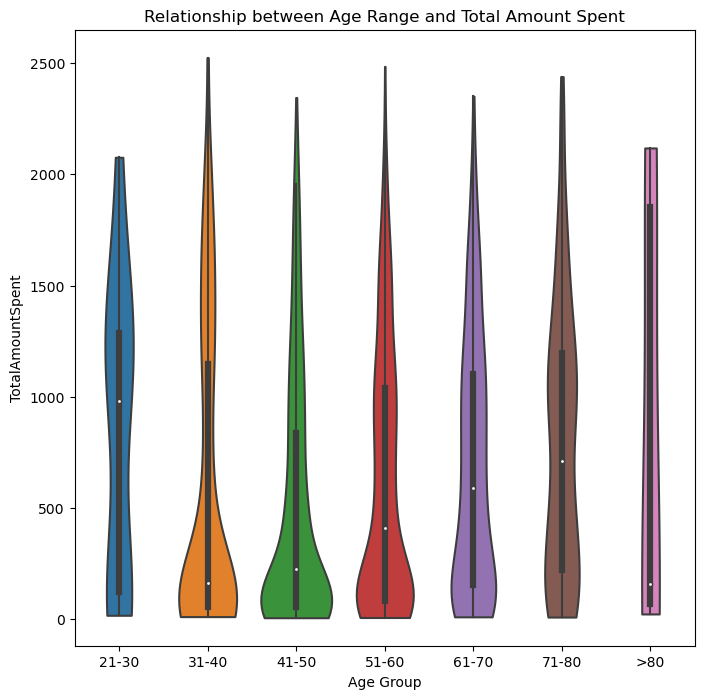

In [ ]:
plt.figure(figsize=(8, 8))
sns.violinplot(x="Age Group", y="TotalAmountSpent", data=df, cut=0, order=order)
plt.title("Relationship between Age Range and Total Amount Spent");

We can see from the summary above that most age range have outliers within them. For example the above 80 customer age range have a lot of ouliers.

In [ ]:
from scipy.stats import iqr

In [ ]:
iqr = iqr(df["Income"], nan_policy="omit")


low = np.nanquantile(df["Income"], 0.25) - 1.5 * iqr
high = np.nanquantile(df["Income"], 0.75) + 1.5 * iqr

In [ ]:
df_cut = df[df["Income"].between(low, high)]

<div class="alert alert-block alert-warning">
Please note that plotly figure will not show when it is uploaded to GitHib due to static stuff. So you can rerun the code once you have it on your Local machine or Check out the Link I include in the repo that display the notebook on web.
</div>

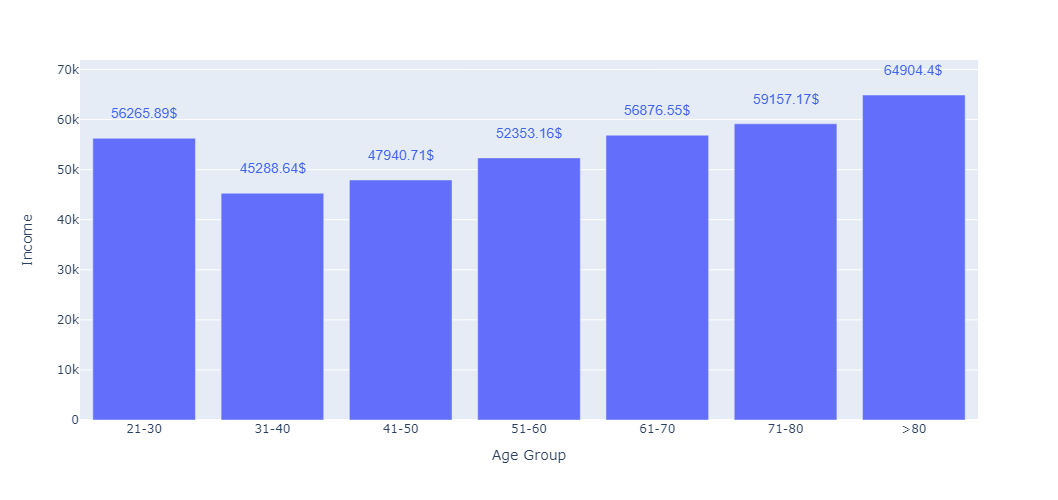

In [ ]:
mask = df_cut.groupby("Age Group")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Age Group", y="Income", height=500)

annotation = []
for x, y in zip(mask["Age Group"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

Interesting to see that the age group that earns more on average are the customers within above 80+, followed by customers within 71-80. Apart from customer age within 21-30. We can see a trend which postulates that as the age group increases so do the Income.

In [ ]:
(df_cut[df_cut["Age Group"] == "21-30"]["Income"]).describe()

count       28.000000
mean     56265.892857
std      28874.031757
min       7500.000000
25%      34824.000000
50%      70839.000000
75%      80254.750000
max      95529.000000
Name: Income, dtype: float64

## Education VS Total Amount Spent

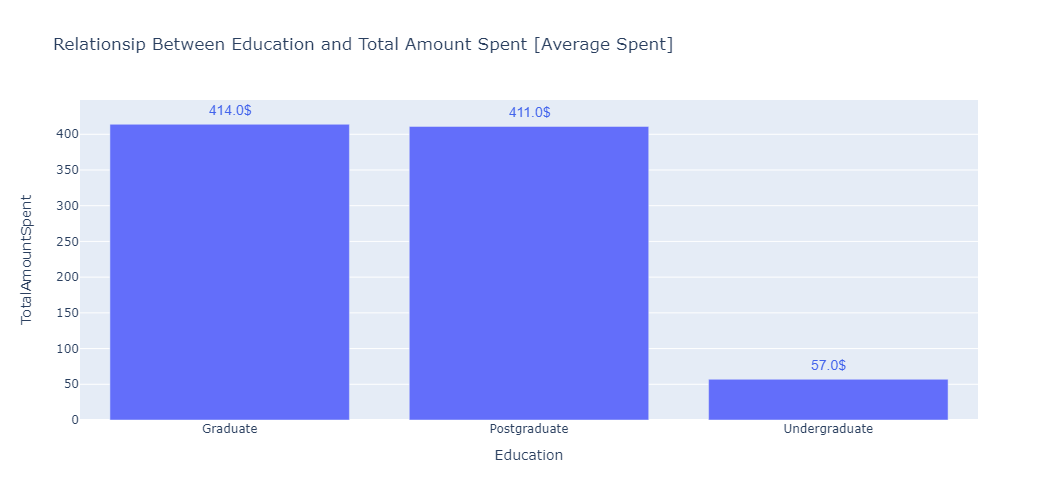

In [ ]:

mask = df.groupby("Education")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Education", y="TotalAmountSpent", height=500,
            title = "Relationsip Between Education and Total Amount Spent [Average Spent]")

annotation = []
for x, y in zip(mask["Education"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +20,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)
fig.show()

Interesting from the above summary we see that there isn't much difference between average spent for both graduate and Postgradute customer. However we see much drop for customers who have undergraduate level of education.
We can postulate that customers who have Graduate education level and above spends approximately 7 times than customers who are undergraduate. That's way too much.

## Education VS Income

Since income is normally disstributed and there are some outliers in it. We will make use of the df_cut dataframe so we can accurately get better conclusion.

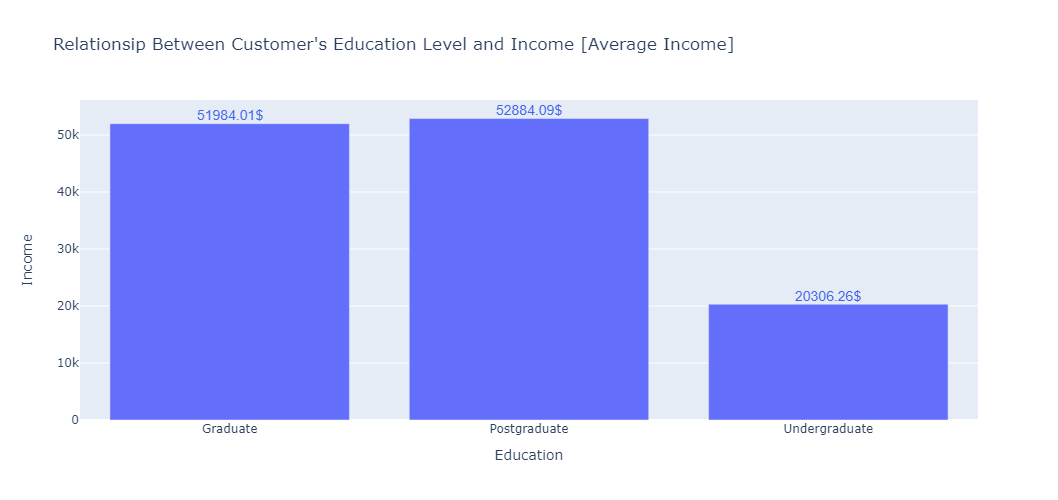

In [ ]:
mask = df_cut.groupby("Education")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Education", y="Income", height=500,
            title = "Relationsip Between Customer's Education Level and Income [Average Income]")

annotation = []
for x, y in zip(mask["Education"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +1500,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)

fig.show()

We can see from the above summary that Customers with Graduate and Post graduate education level earns 2 times above than customers who have undergraduate education level.

## Marital and Total Amount

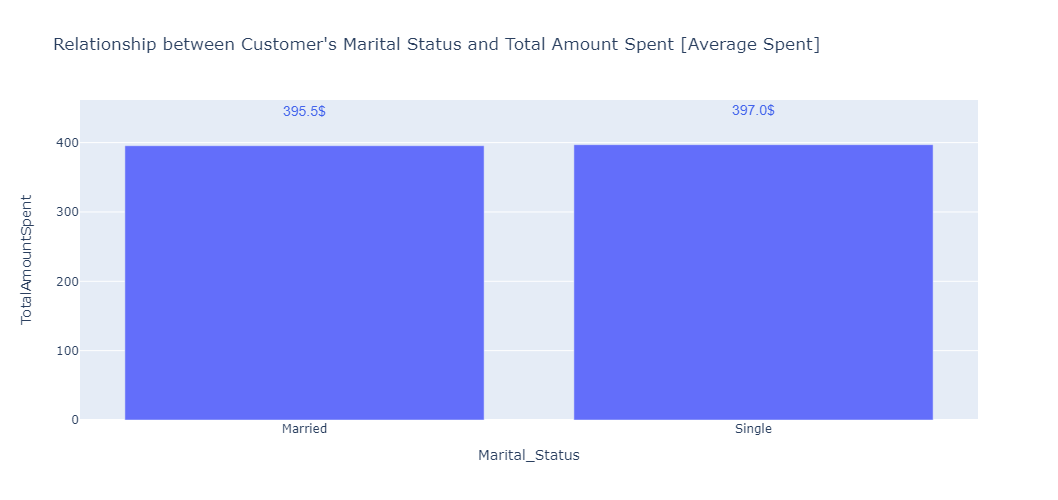

In [ ]:
mask = df.groupby("Marital_Status")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Marital_Status", y="TotalAmountSpent", height=500,
             title="Relationship between Customer's Marital Status and Total Amount Spent [Average Spent]")

annotation = []
for x, y in zip(mask["Marital_Status"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

We can see from the above summary that there isn't relationship between customer's marital status and the average amount spent.

## Marital Status and Income

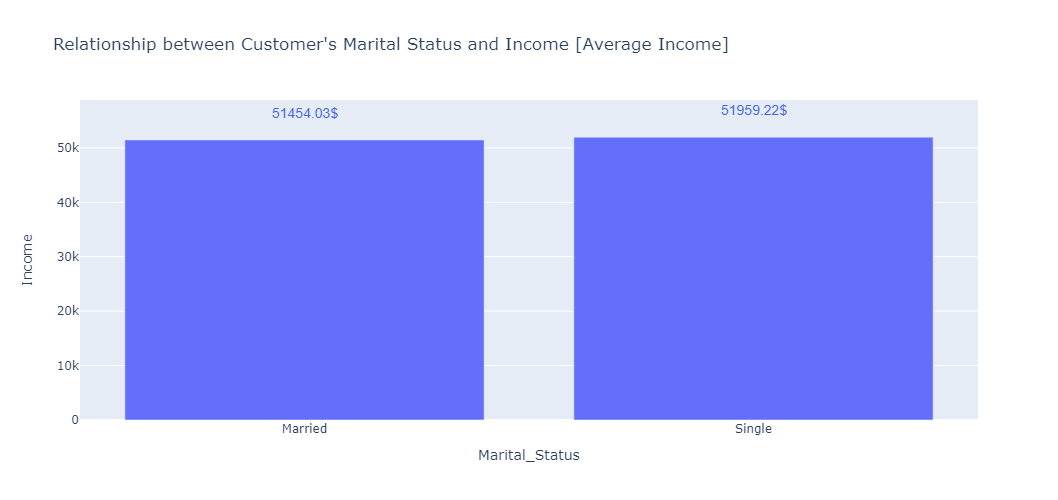

In [ ]:
mask = df_cut.groupby("Marital_Status")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Marital_Status", y="Income", height=500,
             title="Relationship between Customer's Marital Status and Income [Average Income]")

annotation = []
for x, y in zip(mask["Marital_Status"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

Also In terms of Marital Status and Income there isn't relationship concerning that. Customer's earn approximately equall

## Kid's Home VS Total Amount Spent.

In [ ]:
df["Kidhome"].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

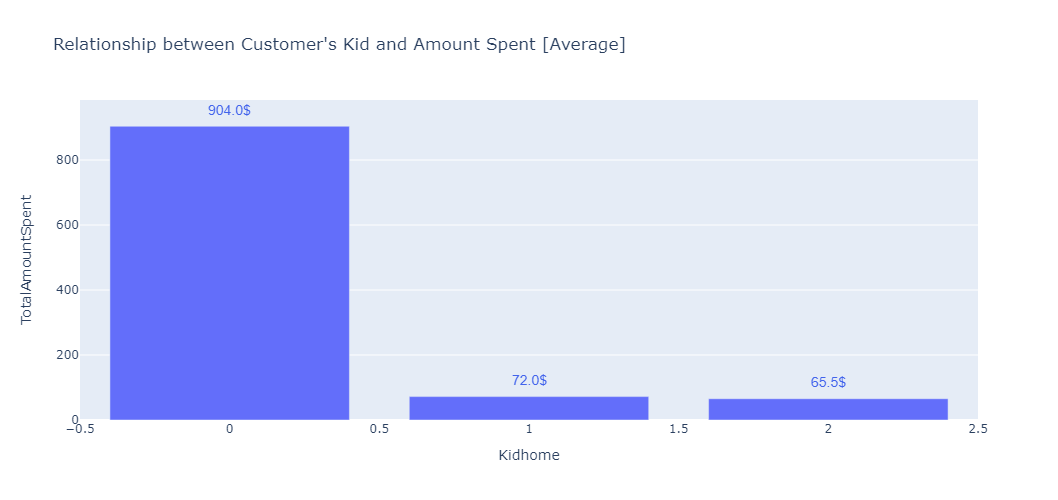

In [ ]:
mask = df.groupby("Kidhome")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Kidhome", y="TotalAmountSpent", height=500,
             title="Relationship between Customer's Kid and Amount Spent [Average]")

annotation = []
for x, y in zip(mask["Kidhome"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

We can see from the above summary that customer's who don't have kids at home spend way high than those who have. They spend about 12 times than others on average.

## Kid's Home VS Income

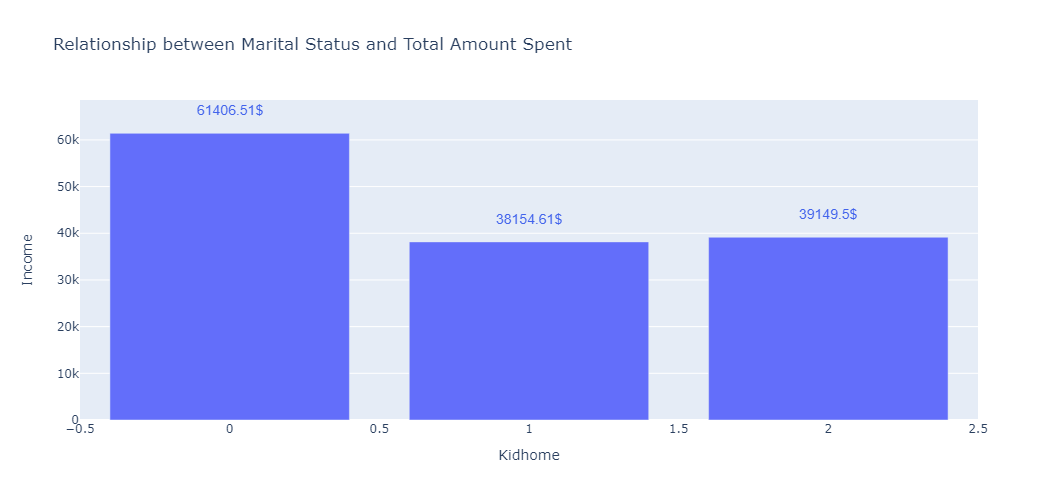

In [ ]:
mask = df_cut.groupby("Kidhome")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Kidhome", y="Income", height=500, title="Relationship between Marital Status and Total Amount Spent")

annotation = []
for x, y in zip(mask["Kidhome"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

We can see that customer's who don't have kids earn more than others.

## Teen Homes VS Total Amount Spent

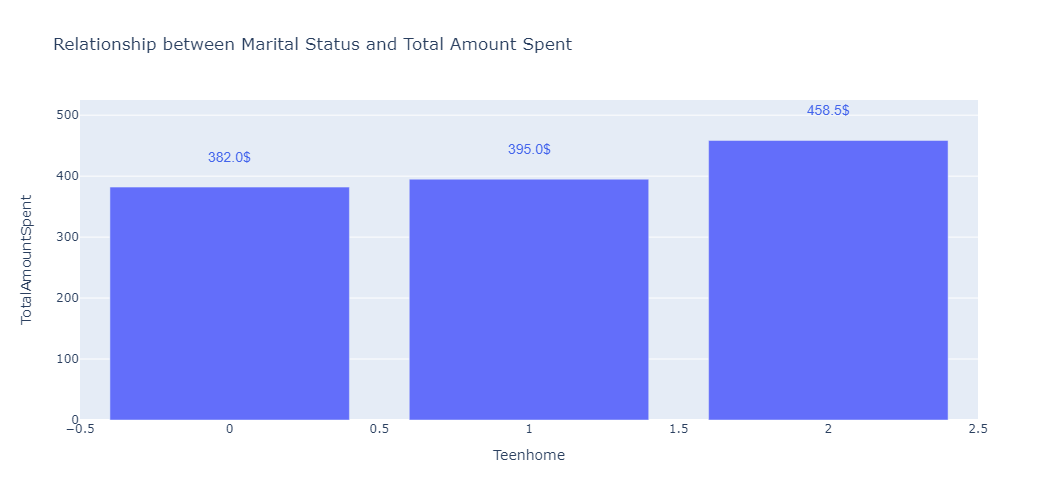

In [ ]:
mask = df.groupby("Teenhome")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Teenhome", y="TotalAmountSpent", height=500, title="Relationship between Marital Status and Total Amount Spent")

annotation = []
for x, y in zip(mask["Teenhome"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_layout(annotations=annotation)
fig.show()

We can see from the above relationship the upward trend concerning Teens at home and Average Amount Spent. As the number of teens increase so do the average amount spent increases.

## Teen's Home VS Income

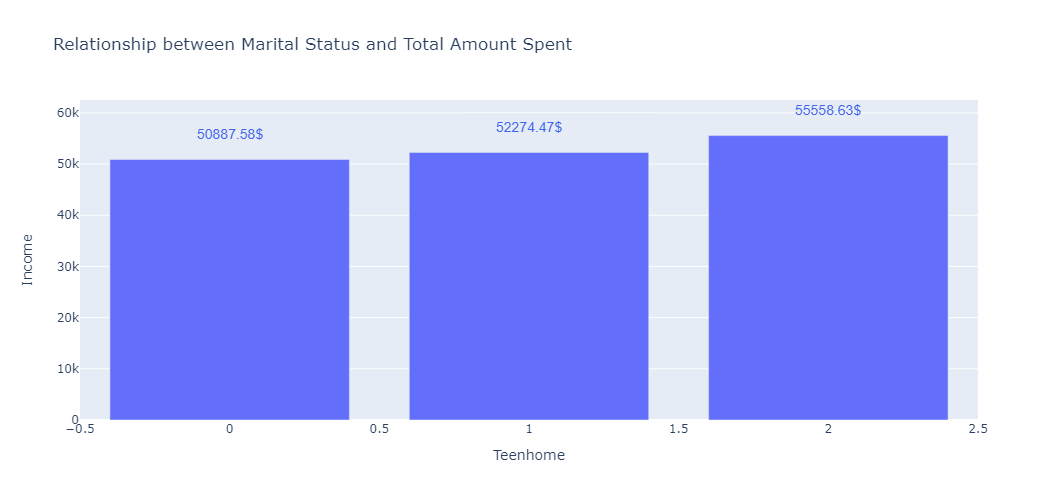

In [ ]:
mask = df_cut.groupby("Teenhome")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Teenhome", y="Income", height=500, title="Relationship between Marital Status and Total Amount Spent")

annotation = []
for x, y in zip(mask["Teenhome"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_layout(annotations=annotation)
fig.show()

Also It happens from the above summary that there is little trend in terms of average income collected.

## Total Children VS Amount Spent.

<div class="alert alert-block alert-warning">
Please note that plotly figure will not show when it is uploaded to GitHib due to static stuff. So you can rerun the code once you have it on your Local machine or Check out the Link I include in the repo that display the notebook on web.
</div>

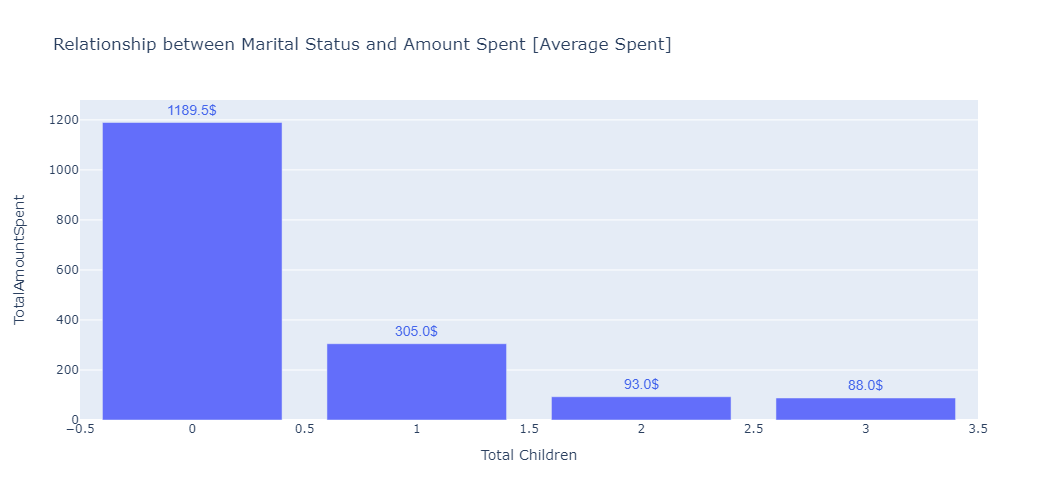

In [ ]:
mask = df.groupby("Total Children")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Total Children", y="TotalAmountSpent", height=500,
             title="Relationship between Marital Status and Amount Spent [Average Spent]")

annotation = []
for x, y in zip(mask["Total Children"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_layout(annotations=annotation)
fig.show()

As the Total number of Children decreases so do the amount Spent. Also we see that customers who don't have childrens spends way more lot than others.

## Income VS Total AmountSpent

Since income is normally disstributed and there are some outliers in it. We will make use of the df_cut dataframe so we can accurately get better conclusion.

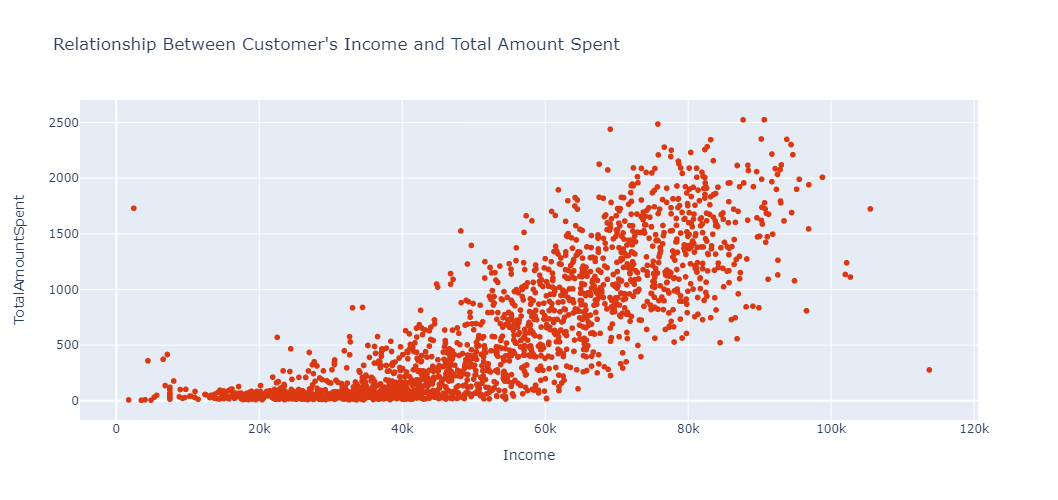

In [ ]:
fig = px.scatter(data_frame=df_cut, x="Income",
                 y="TotalAmountSpent", title="Relationship Between Customer's Income and Total Amount Spent",
                height=500,
                color_discrete_sequence = px.colors.qualitative.G10[1:])
fig.show()

We can see from the above summary that Income of a customers really determine the total amount to be spend on product. As a customer's income increase so do what they buy increases.

# Multivariate Analysis

## Education VS Income VS TotalAmountSpent

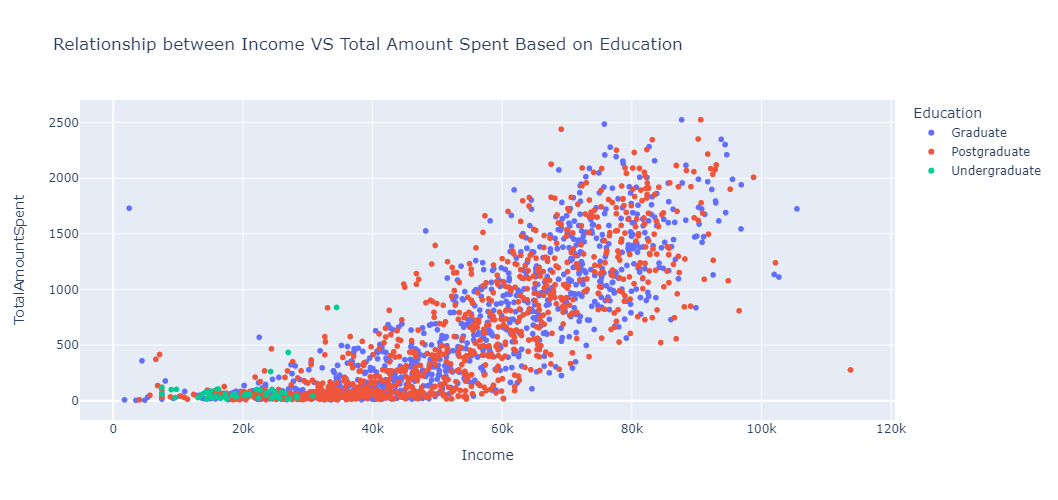

In [ ]:
fig = px.scatter(
    data_frame=df_cut,
    x = "Income",
    y= "TotalAmountSpent",
    title = "Relationship between Income VS Total Amount Spent Based on Education",
    color = "Education",
    height=500
)
fig.show()

We can see truly that undergraduates customers earn little than other customers that's why they spend little less.

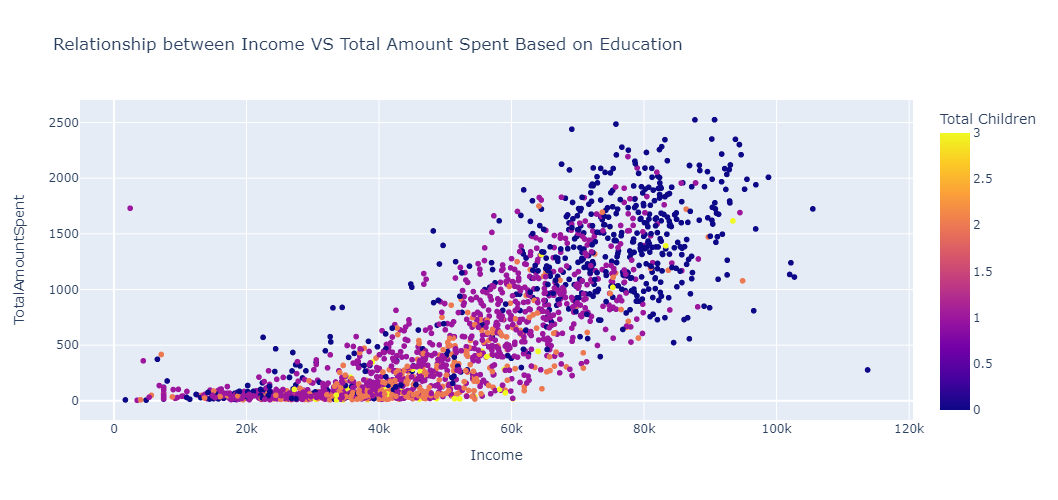

In [ ]:
fig = px.scatter(
    data_frame=df_cut,
    x = "Income",
    y= "TotalAmountSpent",
    title = "Relationship between Income VS Total Amount Spent Based on Education",
    color = "Total Children",
    height=500
)
fig.show()

# Conclusion From EDA

Firstly from the EDA we saw that Income was really the key indicator that was determined the amount a customer will spend.

Also In terms of Education we noticed customers with graduate education level and above tends to spend 12 times higher than those customers with undergraduate education level. The reason for this is because customers with graduate education level and above earns above 2 times than customers with undergradute education level.


Also we noticed a trends in terms of total children and total amount spent. We saw that on average there was a decline on the amount spent as the total number of children increases.I.e, as children increases so do the amount spent on average reduces.

# Building the KMeans Model

We will build the Kmeans Model using two Features to Segment the Customers Demographic and Behaviour "Income" and "Total Amount Spent"

In [ ]:
df["Income"].fillna(df["Income"].median(), inplace=True)

In [ ]:
data = df[["Income", "TotalAmountSpent"]]

In [ ]:
df_log = np.log(data)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

In [ ]:
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_)

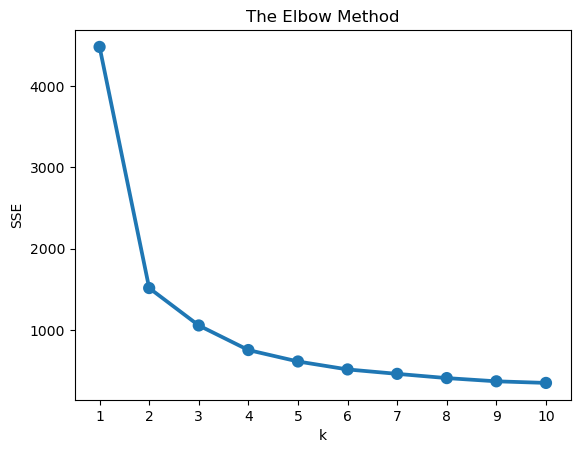

In [ ]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.savefig("Elbow.png")

### You can also Make use of Knee Locator to determine Optimal Cluster

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(x = range(1, 11),
                 y = errors,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))


The optimum number of clusters is: 3


We will build our Kmeans using 3 clusters.

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [ ]:
data = data.assign(ClusterLabel= model.labels_)

In [ ]:
data.groupby("ClusterLabel")[["Income", "TotalAmountSpent"]].median()

,Income,TotalAmountSpent
ClusterLabel,,
0,25261.5,43.0
1,69084.0,1069.5
2,42641.0,145.0


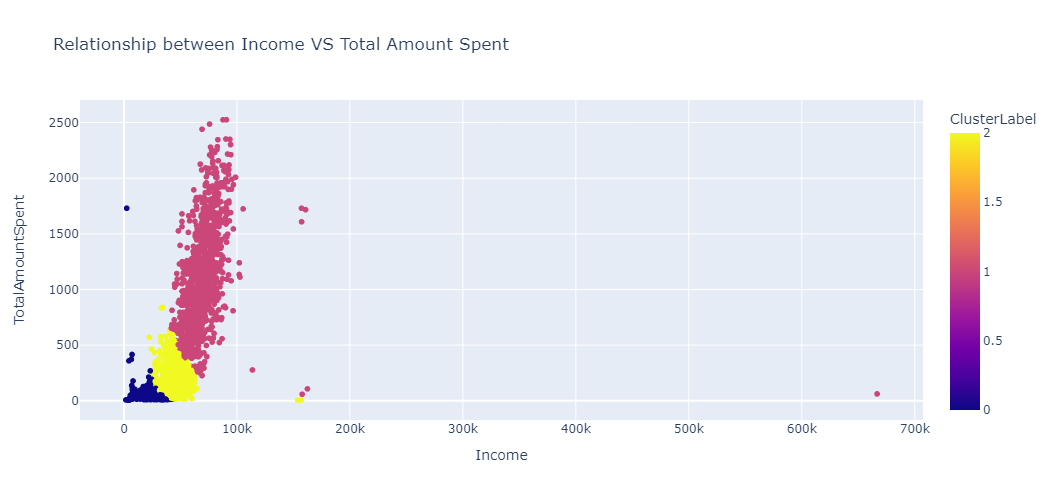

In [ ]:
fig = px.scatter(
    data_frame=data,
    x = "Income",
    y= "TotalAmountSpent",
    title = "Relationship between Income VS Total Amount Spent",
    color = "ClusterLabel",
    height=500
)
fig.show()

#### Interpreting the cluster Label.

- Cluster 0: Customers with low Income and Low spending.
- Cluster 1: Customer with moderate Income and Moderate spending.
- Cluster 3: Custoemers who earn much and spend much.

### Building The Kmeans Model with Three Features

In [ ]:
data = df[["Age", "Income", "TotalAmountSpent"]]

In [ ]:
df_log = np.log(data)
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)


In [ ]:
sse = {}
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    sse[k] = model.inertia_

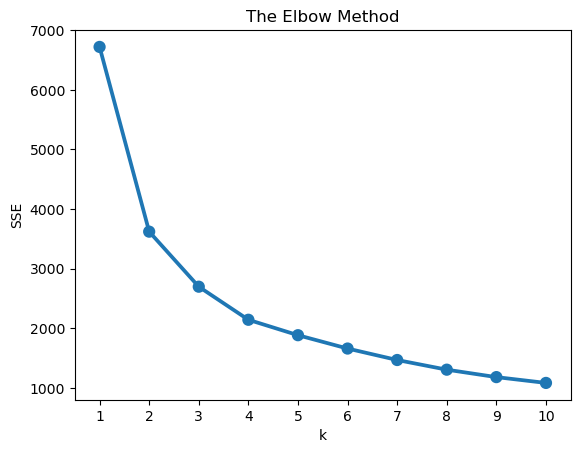

In [ ]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [ ]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_scaled)


data = data.assign(ClusterLabel= model.labels_)

In [ ]:
result = data.groupby("ClusterLabel").agg({"Age":"mean", "Income":"median", "TotalAmountSpent":"median"}).round()

In [ ]:
result

,Age,Income,TotalAmountSpent
ClusterLabel,,,
0,44.0,67402.0,1001.0
1,65.0,62814.0,822.0
2,49.0,31801.0,54.0


### Interpreting the cluster label

- Cluster 0: Middle Age High Rollers (High Income and High Spending).
- Cluster 1: Middle Age Average Joes (Low Income Low Spend).
- Cluster 2: Old Age High Rollers (High Income and High Spending).
- Cluster 3: Old Age Average Joes (Low Income Low Spend).

## Visualizing The Result

In [ ]:
fig = px.scatter_3d(data_frame=data, x="Income",
                    y="TotalAmountSpent", z="Age", color="ClusterLabel", height=550,
                   title = "Visualizing Cluster Result Using 3 Features")
fig.show()

### Interpreting Result

- Cluster 1 depicts young customers that earn way lot and also spend a lot.
- Cluster 2 translates to old customer that earn lot and also spend high.
- Cluster 3 depicts young customers that earn lows and also spend low.

### Thanks for making to the end of my project. Don't forget to star and Fork the Repo. Thank you

<div class="alert alert-block alert-warning">
Please note that plotly figure will not show when it is uploaded to GitHib due to static stuff. So you can rerun the code once you have it on your Local machine or Check out the Link I include in the repo that display the notebook on web.
</div>